In [9]:
#Connecting to Gdrive
from google.colab import drive 
drive.mount('/content/gdrive')

#changing the working directory
%cd /content/gdrive/My Drive/Colab Notebooks/Assign

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/Assign


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
comm_df = pd.read_csv("commission_table.csv")
invt_df = pd.read_csv("current_inventory_data.csv")
hist_df = pd.read_csv("historical_data.csv")
print(comm_df.shape,invt_df.shape,hist_df.shape)

(138, 3) (25000, 24) (685582, 24)


## EDA on current inventory data

In [ ]:
invt_df.sample(5)

,Unnamed: 0,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,sold_flag,height_of_picture,width_of_picture,aspect_ratio,no_of_pictures,test1,test2
19138,46079,seat,leon,11200.0,2015.0,1598.0,77.0,nan,NaN,None,auto,5,5,diesel,2016-01-10 09:55:31.370629+00,2016-01-19 20:30:15.837251+00,18900.00,0,105,225,2.1428,5,2016-01-10 09:55:31.370629+00,2016-01-19 20:30:15.837251+00
20546,397512,hyundai,i30,9.0,2014.0,1400.0,73.0,other,NaN,2017,man,5,5,NaN,2016-02-12 17:57:07.85761+00,2016-07-03 18:47:01.067284+00,11499.00,0,50,200,4,7,2016-02-12 17:57:07.85761+00,2016-07-03 18:47:01.067284+00
19152,436201,skoda,fabia,NaN,NaN,NaN,NaN,other,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-23 18:47:22.206731+00,2017-03-10 01:22:06.877601+00,1295.34,0,60,468,7.8,4,2017-02-23 18:47:22.206731+00,2017-03-10 01:22:06.877601+00
11595,428959,bmw,NaN,170898.0,2012.0,2993.0,190.0,NaN,NaN,None,auto,4,5,diesel,2015-11-30 16:46:02.615539+00,2016-02-10 20:13:36.626636+00,24289.60,0,?,?,?,7,2015-11-30 16:46:02.615539+00,2016-02-10 20:13:36.626636+00
13229,144608,mercedes-benz,NaN,8000.0,2016.0,2143.0,120.0,other,NaN,2018,man,5,3,NaN,2016-02-17 12:51:56.856521+00,2016-07-03 19:00:27.635435+00,38675.00,0,45,345,7.6666,3,2016-02-17 12:51:56.856521+00,2016-07-03 19:00:27.635435+00


In [ ]:
invt_df.drop(['Unnamed: 0','height_of_picture', 'width_of_picture', 'color_slug','aspect_ratio','test1', 'test2','model','stk_year'], axis=1,inplace=True)

In [ ]:
invt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                21402 non-null  object 
 1   mileage              22473 non-null  float64
 2   manufacture_year     22508 non-null  float64
 3   engine_displacement  19695 non-null  float64
 4   engine_power         21022 non-null  float64
 5   body_type            19237 non-null  object 
 6   transmission         19772 non-null  object 
 7   door_count           20742 non-null  object 
 8   seat_count           19728 non-null  object 
 9   fuel_type            12079 non-null  object 
 10  date_created         25000 non-null  object 
 11  date_last_seen       25000 non-null  object 
 12  price_eur            25000 non-null  float64
 13  sold_flag            25000 non-null  int64  
 14  no_of_pictures       25000 non-null  int64  
dtypes: float64(5), int64(2), object(8)
m

In [ ]:
invt_df.replace(r"^ +| +$", r"", regex=True, inplace=True)

Handling NULL values

In [ ]:
#replacing null values
invt_df['transmission'].fillna("man", inplace = True)

In [ ]:
invt_df['door_count'].fillna("4", inplace = True)
invt_df['door_count'] .replace({"0": "4","None": "4"}, inplace=True)

In [ ]:
invt_df['seat_count'].fillna("5", inplace = True)
invt_df['seat_count'] .replace({"0": "5","49": "5","17": "5","12": "5","53": "1","14": "1","None": "5"}, inplace=True)

In [ ]:
invt_df['fuel_type'].fillna("gasoline", inplace = True)

In [ ]:
invt_df['body_type'].fillna("compact", inplace = True)
invt_df['body_type'] .replace({"COMPACT": "compact","com_pact": "compact","nan":"compact"}, inplace=True)

In [ ]:
invt_df['engine_power'].fillna(invt_df['engine_power'].mode()[0], inplace=True)

In [ ]:
invt_df2 = invt_df[invt_df['manufacture_year'].notna()]
invt_df2 = invt_df2[invt_df2['maker'].notna()]
invt_df2.shape

(19412, 15)

In [ ]:
invt_df2.loc[invt_df2["mileage"] == 0.0, "mileage"] = 10
invt_df2.loc[invt_df2["mileage"] >= 75.0, "mileage"] = 10
invt_df2['mileage'].fillna(invt_df2['mileage'].mode()[0], inplace=True)

In [ ]:
invt_df2.loc[invt_df2["engine_displacement"] == 0.0, "engine_displacement"] = invt_df2['engine_displacement'].mode()[0]
invt_df2.loc[invt_df2["engine_displacement"] >= 10000.0, "engine_displacement"] = invt_df2['engine_displacement'].mode()[0]
invt_df2['engine_displacement'].fillna(invt_df2['engine_displacement'].mode()[0], inplace=True)


In [42]:
#invt_df2.to_excel("yugen_cleaned.xlsx")
invt_df2 = pd.read_excel("yugen_cleaned.xlsx")
invt_df2=invt_df2 .drop('Unnamed: 0',axis=1)

In [43]:
invt_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19412 entries, 0 to 19411
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                19412 non-null  object 
 1   mileage              19412 non-null  int64  
 2   manufacture_year     19412 non-null  int64  
 3   engine_displacement  19412 non-null  int64  
 4   engine_power         19412 non-null  int64  
 5   body_type            19412 non-null  object 
 6   transmission         19412 non-null  object 
 7   door_count           19412 non-null  int64  
 8   seat_count           19412 non-null  int64  
 9   fuel_type            19412 non-null  object 
 10  date_created         19412 non-null  object 
 11  date_last_seen       19412 non-null  object 
 12  price_eur            19412 non-null  float64
 13  sold_flag            19412 non-null  int64  
 14  no_of_pictures       19412 non-null  int64  
dtypes: float64(1), int64(8), object(6)
m

In [44]:
invt_df2.loc[invt_df2["manufacture_year"] <= 1886.0, "manufacture_year"] = 2009.0

In [45]:
invt_df2.head()

,maker,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur,sold_flag,no_of_pictures
0,volkswagen,10,1900,1896,85,van,man,4,5,diesel,2016-12-29 16:02:25.656542+00,2017-02-09 02:10:59.686135+00,1295.34,0,5
1,audi,10,2007,8400,110,other,man,4,5,gasoline,2016-02-12 10:45:29.950636+00,2016-07-03 18:19:20.659466+00,12176.17,0,2
2,skoda,10,2005,1968,55,other,man,4,5,gasoline,2016-12-05 17:41:06.32795+00,2016-12-18 07:55:35.445992+00,1295.34,1,4
3,mercedes-benz,10,2014,1595,90,compact,auto,4,5,gasoline,2016-01-26 01:58:34.274634+00,2016-02-11 07:51:10.138757+00,26880.00,0,3
4,volkswagen,10,2015,1395,92,other,auto,4,5,gasoline,2016-03-04 11:30:51.295258+00,2016-07-03 17:33:07.548746+00,26532.27,0,3


In [46]:
invt_df2['created_days']=0
invt_df2['lastseen_days']=0

In [47]:
invt_df2['date_last_seen'][17576] = '2011-02-28 00:00:48.109423+00'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
from datetime import date
current = date(2017, 4, 1)

for ind in invt_df2.index:
  created_string = invt_df2['date_created'][ind]
  created_string = created_string.strip()
  x = created_string.split(" ")[0]
  x = x.strip()
  y = x.split("-")
  y = list(map(int, y))
  date_value = date(y[0],y[1],y[2])
  delta = current - date_value
  invt_df2['created_days'][ind] = delta.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [49]:
for ind in invt_df2.index:
  lastseen_string = invt_df2['date_last_seen'][ind]
  lastseen_string = lastseen_string.strip()
  x = lastseen_string.split(" ")[0]
  x = x.strip()
  y = x.split("-")
  y = list(map(int, y))
  date_value = date(y[0],y[1],y[2])
  delta = current - date_value
  invt_df2['lastseen_days'][ind] = delta.days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [50]:
invt_df3 = invt_df2.drop(['date_created','date_last_seen'],axis=1)

In [51]:
invt_df3.head(5)

,maker,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,sold_flag,no_of_pictures,created_days,lastseen_days
0,volkswagen,10,1900,1896,85,van,man,4,5,diesel,1295.34,0,5,93,51
1,audi,10,2007,8400,110,other,man,4,5,gasoline,12176.17,0,2,414,272
2,skoda,10,2005,1968,55,other,man,4,5,gasoline,1295.34,1,4,117,104
3,mercedes-benz,10,2014,1595,90,compact,auto,4,5,gasoline,26880.00,0,3,431,415
4,volkswagen,10,2015,1395,92,other,auto,4,5,gasoline,26532.27,0,3,393,272


In [52]:
invt_df3.loc[invt_df3["lastseen_days"] >= invt_df3["created_days"], "lastseen_days"] = invt_df3["created_days"]

In [53]:
invt_df3.dtypes

maker                   object
mileage                  int64
manufacture_year         int64
engine_displacement      int64
engine_power             int64
body_type               object
transmission            object
door_count               int64
seat_count               int64
fuel_type               object
price_eur              float64
sold_flag                int64
no_of_pictures           int64
created_days             int64
lastseen_days            int64
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
objList = invt_df3.select_dtypes(include = "object").columns
le = LabelEncoder()

for feat in objList:
  if feat != 'maker':
    invt_df3[feat] = le.fit_transform(invt_df3[feat].astype(str))

print (invt_df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19412 entries, 0 to 19411
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   maker                19412 non-null  object 
 1   mileage              19412 non-null  int64  
 2   manufacture_year     19412 non-null  int64  
 3   engine_displacement  19412 non-null  int64  
 4   engine_power         19412 non-null  int64  
 5   body_type            19412 non-null  int64  
 6   transmission         19412 non-null  int64  
 7   door_count           19412 non-null  int64  
 8   seat_count           19412 non-null  int64  
 9   fuel_type            19412 non-null  int64  
 10  price_eur            19412 non-null  float64
 11  sold_flag            19412 non-null  int64  
 12  no_of_pictures       19412 non-null  int64  
 13  created_days         19412 non-null  int64  
 14  lastseen_days        19412 non-null  int64  
dtypes: float64(1), int64(13), object(1)


In [55]:
invt_df3.to_excel("yugin_upto_labelling.xlsx")

In [56]:
#invt_df3= pd.read_excel("yugin_upto_labelling.xlsx")
#invt_df3=invt_df3.drop('Unnamed: 0',axis=1)
invt_df3.head()

,maker,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,sold_flag,no_of_pictures,created_days,lastseen_days
0,volkswagen,10,1900,1896,85,8,1,4,5,1,1295.34,0,5,93,51
1,audi,10,2007,8400,110,4,1,4,5,3,12176.17,0,2,414,272
2,skoda,10,2005,1968,55,4,1,4,5,3,1295.34,1,4,117,104
3,mercedes-benz,10,2014,1595,90,0,0,4,5,3,26880.00,0,3,431,415
4,volkswagen,10,2015,1395,92,4,0,4,5,3,26532.27,0,3,393,272


In [57]:
invt_df3.describe()

,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,sold_flag,no_of_pictures,created_days,lastseen_days
count,19412.000000,19412.000000,19412.000000,19412.000000,19412.000000,19412.000000,19412.000000,19412.000000,19412.000000,1.941200e+04,19412.000000,19412.000000,19412.000000,19412.000000
mean,10.095044,2005.834175,1910.853802,100.891716,2.748094,0.765197,4.070884,4.927261,2.575726,1.267438e+04,0.193952,4.010251,357.282403,292.246703
std,2.585089,17.397354,704.893755,46.611712,1.989336,0.423887,0.814026,0.686996,0.817474,1.575215e+05,0.395402,1.998956,141.449427,134.596687
min,1.000000,1895.000000,12.000000,6.000000,0.000000,0.000000,2.000000,1.000000,0.000000,4.000000e-02,0.000000,1.000000,16.000000,16.000000
25%,10.000000,2004.000000,1560.000000,74.000000,0.000000,1.000000,4.000000,5.000000,3.000000,1.301745e+03,0.000000,2.000000,387.000000,272.000000
50%,10.000000,2009.000000,1968.000000,96.000000,4.000000,1.000000,4.000000,5.000000,3.000000,7.233805e+03,0.000000,4.000000,404.000000,272.000000
75%,10.000000,2013.000000,1995.000000,110.000000,4.000000,1.000000,5.000000,5.000000,3.000000,1.600000e+04,0.000000,6.000000,451.000000,416.000000
max,67.000000,2017.000000,9999.000000,923.000000,8.000000,1.000000,6.000000,9.000000,4.000000,2.178750e+07,1.000000,7.000000,504.000000,504.000000


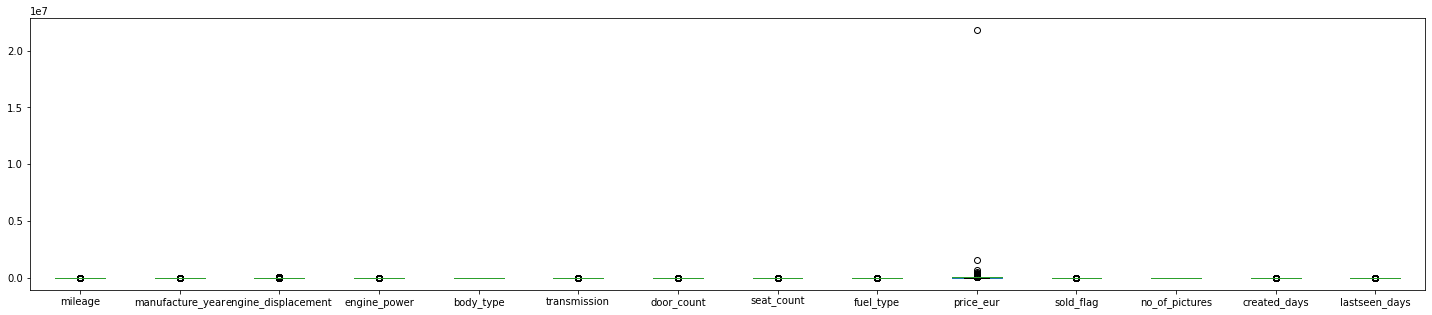

In [58]:
invt_df3.plot(kind='box' , figsize = (25,5) )

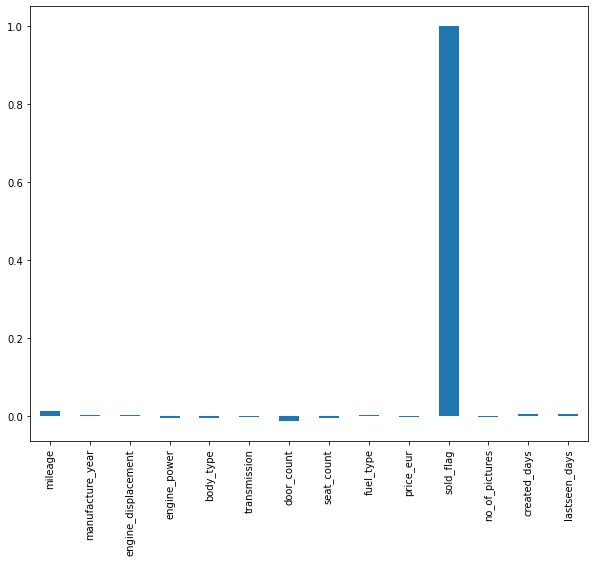

In [59]:
plt.figure(figsize=(10,8))
invt_df3.corr()['sold_flag'].plot(kind='bar');

Door Count, Mileage seems have positive impact for selling car.

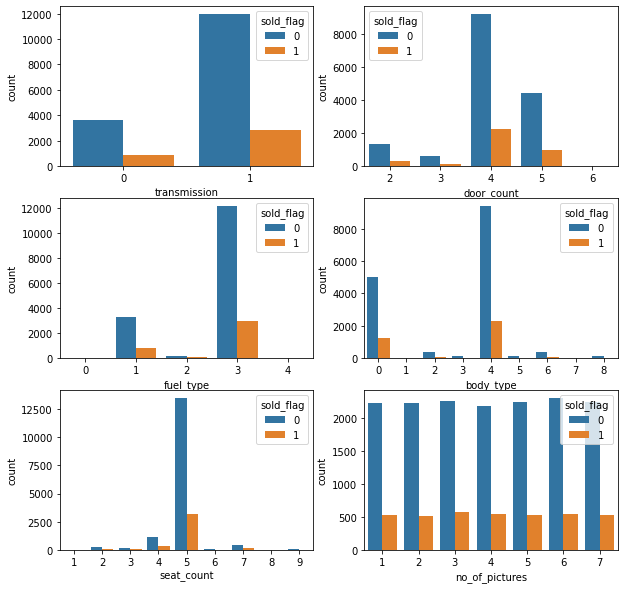

In [29]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,10))
sns.countplot(x='transmission', hue='sold_flag', data=invt_df3,ax=axes[0,0])
sns.countplot(x='door_count', hue='sold_flag', data=invt_df3,ax=axes[0,1])
sns.countplot(x='fuel_type', hue='sold_flag', data=invt_df3,ax=axes[1,0])
sns.countplot(x='body_type', hue='sold_flag', data=invt_df3,ax=axes[1,1])
sns.countplot(x='seat_count', hue='sold_flag', data=invt_df3,ax=axes[2,0])
sns.countplot(x='no_of_pictures', hue='sold_flag', data=invt_df3,ax=axes[2,1])
plt.show()

Most common categorical values such as doors=4, seats=5..etc is most bing sold & No.pictures isn't matter.

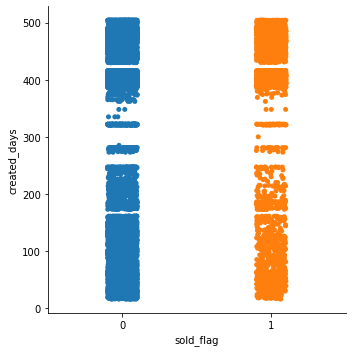

In [39]:
sns.catplot(x= 'sold_flag',y='created_days',data=invt_df3)
plt.show()

Unsold chnaces are higher with cars being posted more than an year or so. 

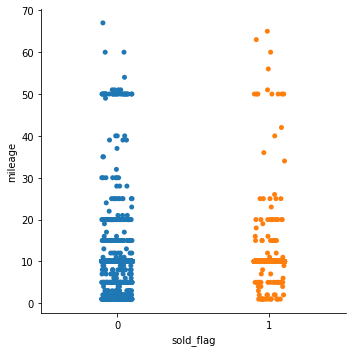

In [34]:
sns.catplot(x= 'sold_flag',y='mileage',data=invt_df3)
plt.show()

Cars with too low mileage isn't being sold much

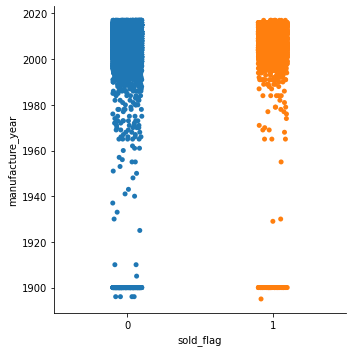

In [35]:
sns.catplot(x= 'sold_flag',y='manufacture_year',data=invt_df3)
plt.show()

Usually cars with manfacturing years above 2000+ is besing sold high

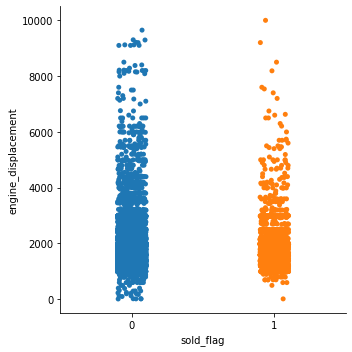

In [36]:
sns.catplot(x= 'sold_flag',y='engine_displacement',data=invt_df3)
plt.show()

Cars with around 2000 displacements are being sold better

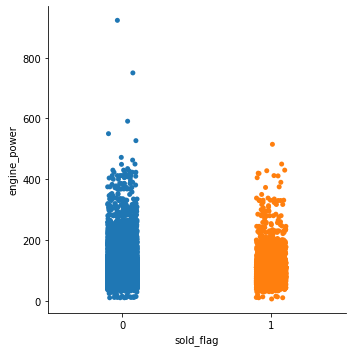

In [37]:
sns.catplot(x= 'sold_flag',y='engine_power',data=invt_df3)
plt.show()

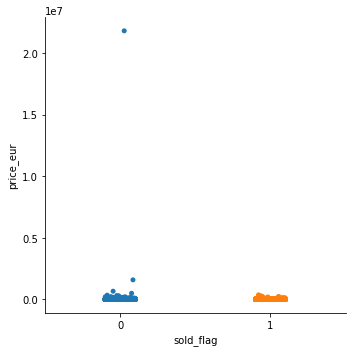

In [38]:
sns.catplot(x= 'sold_flag',y='price_eur',data=invt_df3)
plt.show()

Engine Displacement & power has outliers, in general the higher the power, we prefered if its with in budget (low price)

####Scaling

In [83]:
df_numeric=invt_df3.iloc[:, 1:]
df_maker = invt_df3.iloc[:, :1]


In [84]:
from sklearn.preprocessing import StandardScaler
 
std_scaler = StandardScaler()
 
df_scaled = std_scaler.fit_transform(df_numeric.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)
 
print("Scaled Dataset Using StandardScaler")
df_scaled.head()

Scaled Dataset Using StandardScaler


,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,sold_flag,no_of_pictures,created_days,lastseen_days
0,-0.036767,-6.083506,-0.021073,-0.340947,2.640098,0.553943,-0.087081,0.105882,-1.927604,-0.072240,-0.490532,0.495146,-1.868436,-1.792413
1,-0.036767,0.067013,9.206087,0.195413,0.629325,0.553943,-0.087081,0.105882,0.519019,-0.003163,-0.490532,-1.005677,0.400985,-0.150429
2,-0.036767,-0.047950,0.081073,-0.984579,0.629325,0.553943,-0.087081,0.105882,0.519019,-0.072240,2.038605,-0.005129,-1.698760,-1.398634
3,-0.036767,0.469384,-0.448099,-0.233675,-1.381449,-1.805238,-0.087081,0.105882,0.519019,0.090184,-0.490532,-0.505403,0.521172,0.912032
4,-0.036767,0.526865,-0.731837,-0.190766,0.629325,-1.805238,-0.087081,0.105882,0.519019,0.087977,-0.490532,-0.505403,0.252518,-0.150429


In [86]:
df_scaled=df_maker.join(df_scaled)

In [88]:
df_scaled.to_excel("yugen_cleaned_scaled.xlsx")
invt_df3.to_excel("yugen_cleaned_NOscaled.xlsx")

## EDA on Commission dataset

In [5]:
comm_df = pd.read_csv("commission_table.csv")
comm_df.shape

(138, 3)

In [7]:
comm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Maker       138 non-null    object 
 1   Year        138 non-null    int64  
 2   Commission  138 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.4+ KB


In [12]:
comm_df.describe()

,Year,Commission
count,138.000000,138.000000
mean,2016.000000,0.082101
std,0.819471,0.039807
min,2015.000000,0.020000
25%,2015.000000,0.050000
50%,2016.000000,0.080000
75%,2017.000000,0.117500
max,2017.000000,0.150000


- No nulls
- All values within range & meaningful
- Have correct datatypes

## History dataset EDA

In [13]:
hist_df = pd.read_csv("historical_data.csv")
hist_df.shape

(685582, 24)

In [14]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685582 entries, 0 to 685581
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           685582 non-null  int64  
 1   maker                585690 non-null  object 
 2   model                466704 non-null  object 
 3   mileage              615638 non-null  float64
 4   manufacture_year     618004 non-null  float64
 5   engine_displacement  542123 non-null  float64
 6   engine_power         578455 non-null  float64
 7   body_type            531071 non-null  object 
 8   color_slug           40277 non-null   object 
 9   stk_year             355482 non-null  object 
 10  transmission         542439 non-null  object 
 11  door_count           566499 non-null  object 
 12  seat_count           540479 non-null  object 
 13  fuel_type            328522 non-null  object 
 14  date_created         685582 non-null  object 
 15  date_last_seen   

In [15]:
hist_df.drop(['Unnamed: 0','height_of_picture', 'width_of_picture', 'color_slug','aspect_ratio','test1', 'test2','model','stk_year'], axis=1,inplace=True)
invt_df.replace(r"^ +| +$", r"", regex=True, inplace=True)

In [16]:
hist_df.isnull().sum()

maker                   99892
mileage                 69944
manufacture_year        67578
engine_displacement    143459
engine_power           107127
body_type              154511
transmission           143143
door_count             119083
seat_count             145103
fuel_type              357060
date_created                0
date_last_seen              0
price_eur                   0
sold_flag                   0
no_of_pictures              0
dtype: int64

In [17]:
df = hist_df[hist_df['maker'].notna()]

In [19]:
df.isnull().sum()

maker                       0
mileage                 54309
manufacture_year        54387
engine_displacement    114389
engine_power            80309
body_type              111491
transmission           114466
door_count             108395
seat_count             134097
fuel_type              338567
date_created                0
date_last_seen              0
price_eur                   0
sold_flag                   0
no_of_pictures              0
dtype: int64

In [22]:
duplicate = df[df.duplicated()]
duplicate.shape

(0, 15)